In [1]:
import pandas as pd # data science essentials
import numpy as np 
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model # linear models
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler


file="./birthweight_low.xlsx"


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width',1000)

birth=pd.read_excel(io         =file,
                    sheet_name =0,
                    header     =0)

#displaying head
birth.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [2]:
#getting a feel for the data
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [3]:
birth.shape

(196, 18)

#grouping data into types

CATEGORICAL
male
mwhte
mblck
moth
fhwte
fblck

INTERVAL/COUNT
fmaps
omaps
feduc
meduc
monpre
cigs
drink

CONTINUOUS
npvis
fage
mage
bwght

In [4]:
Categorical_Data= ['male','mwhte','mblck','moth','fhwte','fblck']
Interval_Data= ['feduc','meduc','monpre','cigs','drink']
Continuous_Data= ['npvis','fage','mage','bwght']

In [5]:
#checking for null values
birth.isnull().astype(int).sum(axis=0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

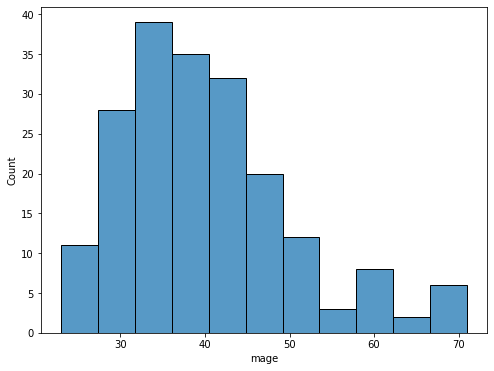

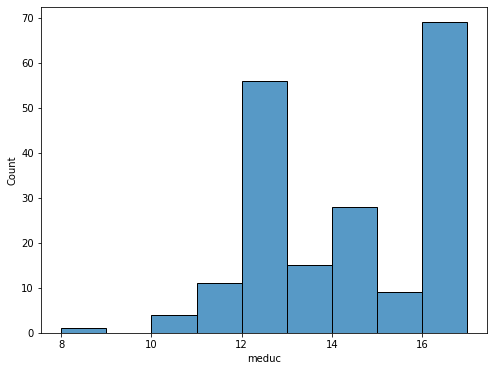

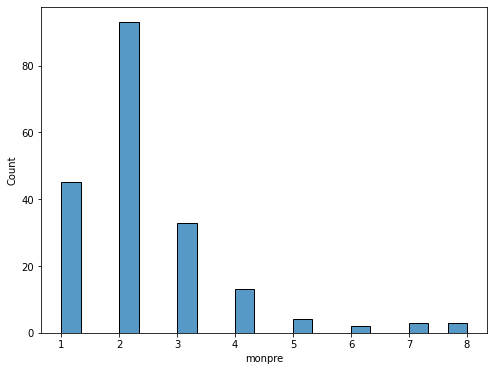

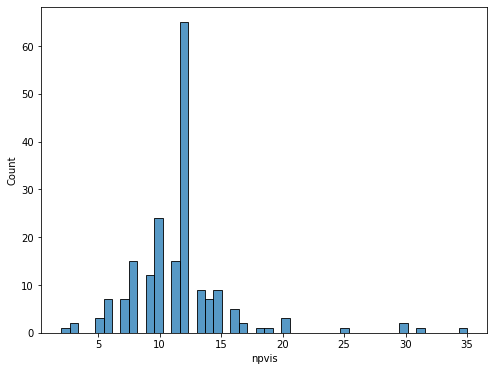

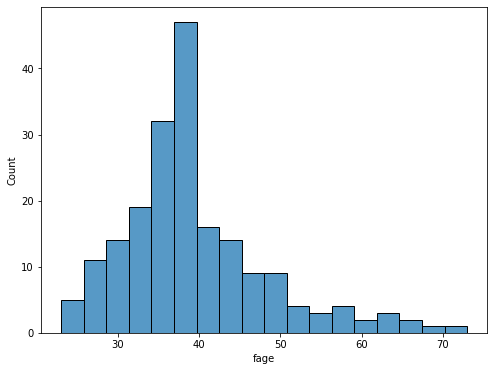

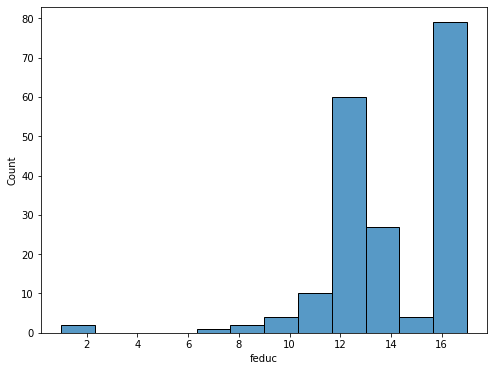

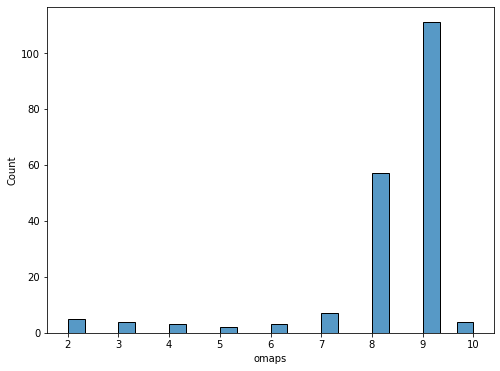

In [6]:
#using a loop to check distributions of columns with missing values and investigate type of data of certain columns
for col in birth:
    
    if col=='fmaps':
        break
# rendering the plot
    fig, ax = plt.subplots(figsize = (8, 6))
    plt.show(sns.histplot(data=birth, x= col))


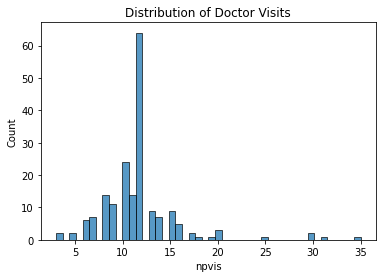

In [7]:
df_dropped = birth.dropna()


# displaying the plot for 'Mas Vnr Area'
sns.histplot(x = 'npvis',
            data = df_dropped,
            kde = False)


# title and labels
plt.title('Distribution of Doctor Visits')


# displaying the plot
plt.show()

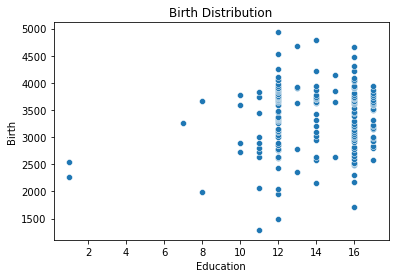

In [8]:
#creating a scatterplot to check data distrubution
sns.scatterplot(data= birth,
            x= 'feduc',
            y= 'bwght',
            )
# title and axis labels
plt.title(label   = "Birth Distribution")
plt.xlabel(xlabel = "Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Birth")

# displaying the histogram
plt.show()

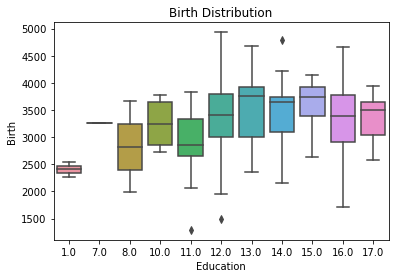

In [9]:
#using a boxplot to check for data distribution and outliers
sns.boxplot(data= birth,
            x= 'feduc',
            y= 'bwght',
            )
# title and axis labels
plt.title(label   = "Birth Distribution")
plt.xlabel(xlabel = "Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Birth")

# displaying the histogram
plt.show()

In [10]:
for col in birth:

    # creating columns with 1s if missing and 0 if not
    if birth[col].isnull().astype(int).sum() > 0:
        birth['m_'+col] = birth[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
birth[    ['m_meduc', 'm_npvis',
             'm_feduc']    ].sum(axis = 0).astype(int)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int32

In [11]:
print(f"""
Original Missing Value Counts:
------------------------------
{birth.isnull().sum(axis=0)})


Sum of Missing Value Flags:
------------------------------
{birth.iloc[ : , -3: ].sum(axis=0)}

""")


Original Missing Value Counts:
------------------------------
mage       0
meduc      3
monpre     0
npvis      3
fage       0
feduc      7
omaps      0
fmaps      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
m_meduc    0
m_npvis    0
m_feduc    0
dtype: int64)


Sum of Missing Value Flags:
------------------------------
m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64




In [12]:
#checking percentage of missing values to total datatset to determine relevance
birth['mv_sum']= birth['m_meduc'] + \
                     birth['m_npvis'] + \
                     birth['m_feduc']
                     
print(f"""

Number of Missing Values per Observation (Pct)
----------------------------------------------
{(birth['mv_sum'].value_counts(normalize = True,
                                sort = True,
                                ascending = True)*100).round(2)}
""")




Number of Missing Values per Observation (Pct)
----------------------------------------------
2     1.53
1     3.57
0    94.90
Name: mv_sum, dtype: float64



In [13]:
m_birth_median = birth['meduc'].median()
f_birth_median = birth['feduc'].median()


# filling carat NAs with MEDIAN
birth['meduc'].fillna(value = m_birth_median,
                         inplace = True)

birth['feduc'].fillna(value = f_birth_median,
                         inplace = True)

# checking to make sure NAs are filled in
print(f"""
{'_' * 40}

Any missing values for mother & father?
{'_' * 40}

{birth['meduc'].isnull().any()}
{birth['feduc'].isnull().any()}
""")


________________________________________

Any missing values for mother & father?
________________________________________

False
False



In [14]:
birth['npvis'].fillna(value = 0,
                         inplace = True)
print(f"""
{'_' * 40}

Any missing values for number of prenatal visits?
{'_' * 40}

{birth['npvis'].isnull().any()}
""")


________________________________________

Any missing values for number of prenatal visits?
________________________________________

False



In [15]:
#checking to see if all missing values have been filled
birth.isnull().sum()

mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
omaps      0
fmaps      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
m_meduc    0
m_npvis    0
m_feduc    0
mv_sum     0
dtype: int64

In [16]:
#running a simple correlation
birth.corr().round(decimals=2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc,mv_sum
mage,1.00,-0.09,0.16,-0.05,0.58,-0.09,-0.21,-0.24,0.17,0.34,-0.05,0.01,-0.02,0.02,-0.08,0.04,0.05,-0.46,0.12,0.01,0.07,0.10
meduc,-0.09,1.00,-0.23,0.14,-0.07,0.62,0.25,0.14,0.10,-0.07,-0.03,-0.28,-0.19,0.46,-0.18,-0.23,0.43,0.09,0.01,-0.02,-0.05,-0.03
monpre,0.16,-0.23,1.00,-0.30,0.04,-0.29,-0.17,-0.08,-0.06,0.02,-0.08,0.08,0.13,-0.21,0.04,0.03,-0.07,-0.05,-0.00,-0.06,0.38,0.21
npvis,-0.05,0.14,-0.30,1.00,-0.04,-0.01,0.08,0.08,0.01,-0.05,-0.03,0.06,-0.08,0.03,0.06,-0.06,0.00,0.04,-0.22,-0.32,-0.17,-0.32
fage,0.58,-0.07,0.04,-0.04,1.00,-0.01,-0.16,-0.20,0.17,0.29,-0.09,0.04,-0.06,0.03,-0.03,-0.03,0.06,-0.40,0.07,-0.06,-0.01,-0.01
feduc,-0.09,0.62,-0.29,-0.01,-0.01,1.00,0.33,0.13,0.05,-0.12,0.08,-0.41,-0.13,0.52,-0.36,-0.15,0.52,0.13,0.06,0.10,0.01,0.07
omaps,-0.21,0.25,-0.17,0.08,-0.16,0.33,1.00,0.64,-0.15,-0.18,-0.01,-0.18,-0.02,0.19,-0.12,-0.01,0.13,0.25,-0.15,0.01,-0.16,-0.15
fmaps,-0.24,0.14,-0.08,0.08,-0.20,0.13,0.64,1.00,-0.09,-0.16,-0.03,-0.02,-0.07,0.09,0.01,-0.04,0.04,0.25,-0.12,0.01,-0.16,-0.14
cigs,0.17,0.10,-0.06,0.01,0.17,0.05,-0.15,-0.09,1.00,0.36,-0.12,0.03,-0.20,0.17,-0.01,-0.19,0.21,-0.57,0.04,0.07,-0.03,0.03
drink,0.34,-0.07,0.02,-0.05,0.29,-0.12,-0.18,-0.16,0.36,1.00,-0.09,0.16,-0.11,-0.04,0.07,-0.10,0.02,-0.74,0.11,-0.03,-0.06,-0.01


In [17]:
birth_corr = birth.loc[ : , ['meduc', 'feduc',
                             'npvis','bwght']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)
birth_corr.sort_values(ascending=False,
                      by = 'bwght')

,meduc,feduc,npvis,bwght
bwght,0.09,0.13,0.04,1.00
feduc,0.62,1.00,-0.01,0.13
meduc,1.00,0.62,0.14,0.09
npvis,0.14,-0.01,1.00,0.04


In [18]:
# developing a correlation matrix based on continuous features
birth_corr = birth[Continuous_Data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
birth_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght    1.00
npvis    0.04
fage    -0.40
mage    -0.46
Name: bwght, dtype: float64

In [19]:
birth_corr = birth.loc[ : , ['npvis', 'fage',
                             'mage', 'cigs',
                             'drink','bwght']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)
birth_corr.sort_values(ascending=False,
                      by = 'bwght')

,npvis,fage,mage,cigs,drink,bwght
bwght,0.04,-0.40,-0.46,-0.57,-0.74,1.00
npvis,1.00,-0.04,-0.05,0.01,-0.05,0.04
fage,-0.04,1.00,0.58,0.17,0.29,-0.40
mage,-0.05,0.58,1.00,0.17,0.34,-0.46
cigs,0.01,0.17,0.17,1.00,0.36,-0.57
drink,-0.05,0.29,0.34,0.36,1.00,-0.74


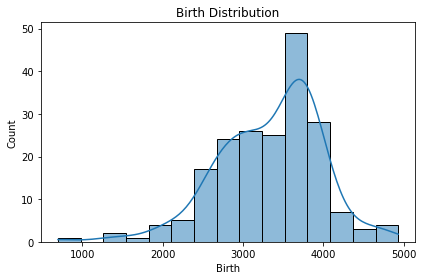

In [20]:
sns.histplot(data=birth,
            x='bwght',
            kde= True)

plt.title(label='Birth Distribution')
plt.xlabel(xlabel='Birth')
plt.ylabel(ylabel='Count')

plt.tight_layout()
plt.show()

In [21]:
# descriptive statistics for numeric data
birth.describe(include = 'number').round(2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc,mv_sum
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.42,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09,0.02,0.02,0.04,0.07
std,10.25,2.04,1.36,4.47,8.98,2.59,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70,0.12,0.12,0.19,0.30
min,23.00,8.00,1.00,0.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00,0.00,0.00,0.00,0.00
25%,33.00,12.00,2.00,9.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25,0.00,0.00,0.00,0.00
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00,0.00,0.00,0.00,0.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50,0.00,0.00,0.00,0.00
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00,1.00,1.00,1.00,2.00


In [22]:
birth['log_bwght'] = np.log(birth['bwght'])

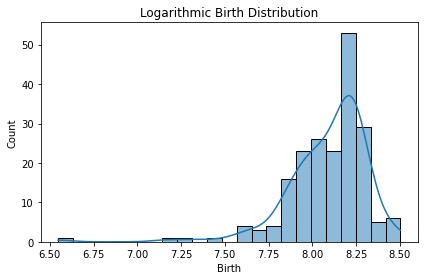

In [23]:
#Checking logged value of y varaiable 
#i have rejected this value as it improves skewness

sns.histplot(data=birth,
            x='log_bwght',
            kde= True)

plt.title(label='Logarithmic Birth Distribution')
plt.xlabel(xlabel='Birth')
plt.ylabel(ylabel='Count')

plt.tight_layout()
plt.show()

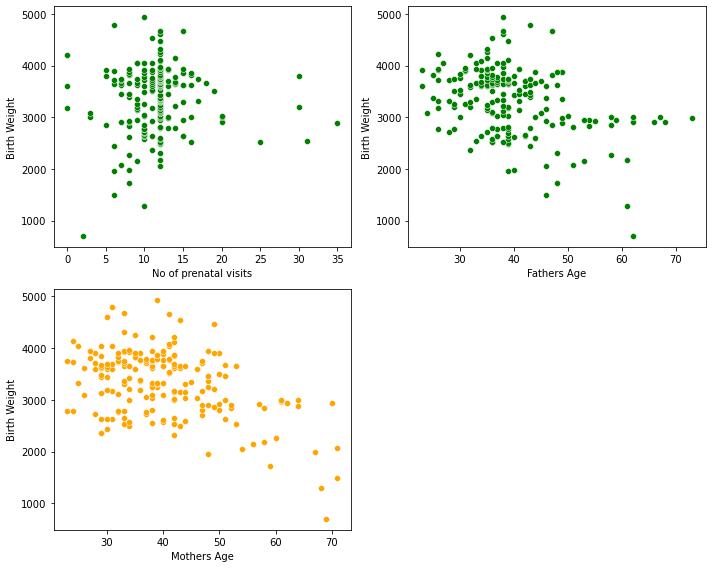

In [24]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birth['npvis'],
                y = birth['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'No of prenatal visits')
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birth['fage'],
                 y = birth['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Fathers Age')
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = birth['mage'],
                 y = birth['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mothers Age')
plt.ylabel(ylabel = 'Birth Weight')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

In [25]:
npvis_zeroes   = len(birth['npvis'][birth['npvis'] == 0]) 
fage_zeroes     = len(birth['fage'][birth['fage']==0]) 
mage_zeroes = len(birth['mage'][birth['mage']==0]) 




# printing a table of the results using rule of 100 to check if theres a need to engineer features
# there was no need as no feature fulfilled this (less than 100 on both sides)
print(f"""
                    No\t\tYes
                    ---------------------
Parental Visits    | {npvis_zeroes}\t\t{len(birth) - npvis_zeroes}
Fathers Age        | {fage_zeroes}\t\t{len(birth) - fage_zeroes}
Mothers Age        | {mage_zeroes}\t\t{len(birth) - mage_zeroes}

""")


                    No		Yes
                    ---------------------
Parental Visits    | 3		193
Fathers Age        | 0		196
Mothers Age        | 0		196




In [26]:
lm_mod= smf.ols(formula= """bwght ~ mage + fage + npvis""",                                    
                                 data=birth)

results= lm_mod.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     20.11
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           2.24e-11
Time:                        22:05:39   Log-Likelihood:                -1519.3
No. Observations:                 196   AIC:                             3047.
Df Residuals:                     192   BIC:                             3060.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4744.2671    225.784     21.012      0.0

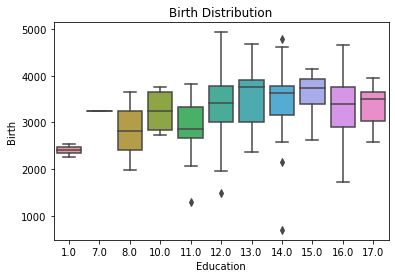

In [27]:
sns.boxplot(data= birth,
            x= 'feduc',
            y= 'bwght',
            )
# title and axis labels
plt.title(label   = "Birth Distribution")
plt.xlabel(xlabel = "Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Birth")

# displaying the histogram
plt.show()

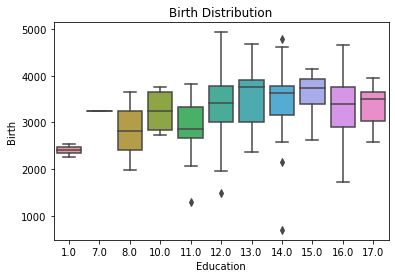

In [28]:
sns.boxplot(data= birth,
            x= 'feduc',
            y= 'bwght',
            )
# title and axis labels
plt.title(label   = "Birth Distribution")
plt.xlabel(xlabel = "Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Birth")

# displaying the histogram
plt.show()

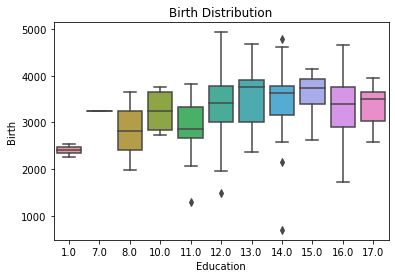

In [29]:
sns.boxplot(data= birth,
            x= 'feduc',
            y= 'bwght',
            )
# title and axis labels
plt.title(label   = "Birth Distribution")
plt.xlabel(xlabel = "Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Birth")

# displaying the histogram
plt.show()

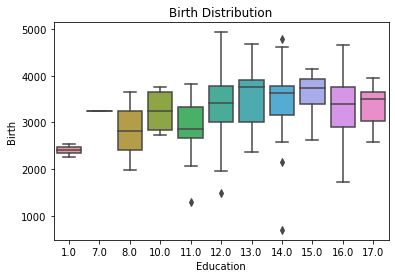

In [30]:
sns.boxplot(data= birth,
            x= 'feduc',
            y= 'bwght',
            )
# title and axis labels
plt.title(label   = "Birth Distribution")
plt.xlabel(xlabel = "Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Birth")

# displaying the histogram
plt.show()

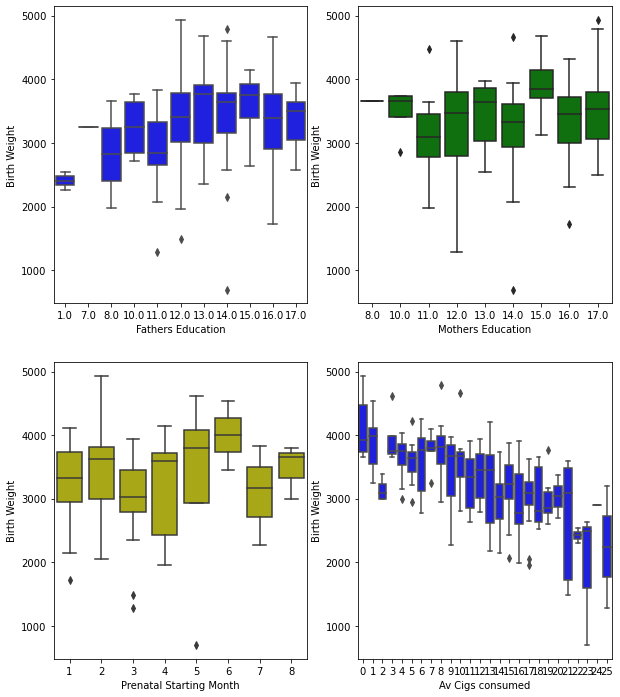

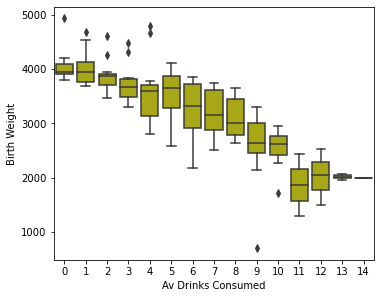

In [31]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.boxplot(x = birth['feduc'],
                y = birth['bwght'],
                color = 'b')


# adding labels but not adding title
plt.xlabel(xlabel = 'Fathers Education')
plt.ylabel(ylabel = 'Birth Weight')


plt.subplot(2, 2, 2)
sns.boxplot(x = birth['meduc'],
                y = birth['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mothers Education')
plt.ylabel(ylabel = 'Birth Weight')


plt.subplot(2, 2, 3)
sns.boxplot(x = birth['monpre'],
                y = birth['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Prenatal Starting Month')
plt.ylabel(ylabel = 'Birth Weight')


plt.subplot(2, 2, 4)
sns.boxplot(x = birth['cigs'],
                y = birth['bwght'],
                color = 'b')


# adding labels but not adding title
plt.xlabel(xlabel = 'Av Cigs consumed')
plt.ylabel(ylabel = 'Birth Weight')

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.boxplot(x = birth['drink'],
                y = birth['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Av Drinks Consumed')
plt.ylabel(ylabel = 'Birth Weight')

plt.tight_layout()
plt.show()

In [32]:
birth['log_feduc'] = np.log(birth['feduc'])
birth['log_meduc'] = np.log(birth['meduc'])
birth['log_monpre'] = np.log(birth['monpre'])

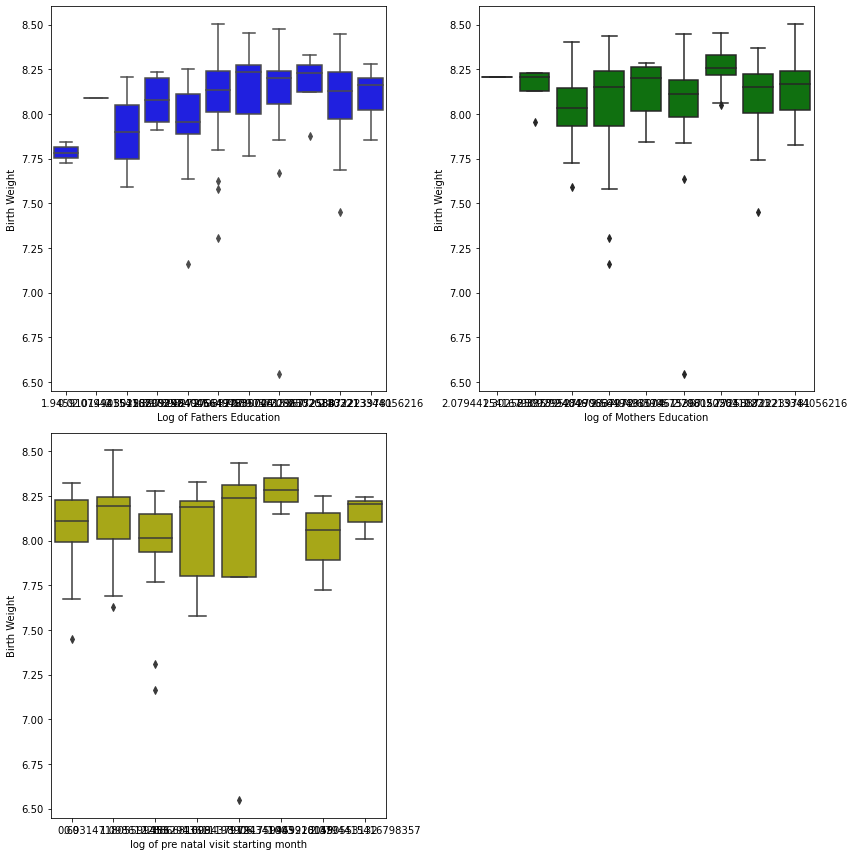

In [33]:
# setting figure size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.boxplot(x = birth['log_feduc'],
                y = birth['log_bwght'],
                color = 'b')


# adding labels but not adding title
plt.xlabel(xlabel = 'Log of Fathers Education')
plt.ylabel(ylabel = 'Birth Weight')


plt.subplot(2, 2, 2)
sns.boxplot(x = birth['log_meduc'],
                y = birth['log_bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'log of Mothers Education')
plt.ylabel(ylabel = 'Birth Weight')


plt.subplot(2, 2, 3)
sns.boxplot(x = birth['log_monpre'],
                y = birth['log_bwght'],
                color = 'y')

plt.xlabel(xlabel = 'log of pre natal visit starting month')
plt.ylabel(ylabel = 'Birth Weight')

plt.tight_layout()
plt.show()

In [34]:
# log transforming Sale_Price and saving it to the dataset
birth['log_mage'] = np.log(birth['mage'])
birth['log_fage'] = np.log(birth['fage'])

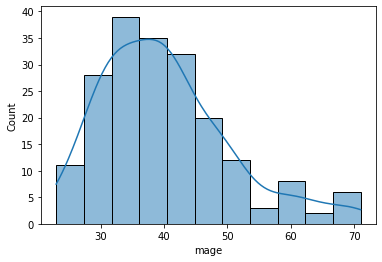

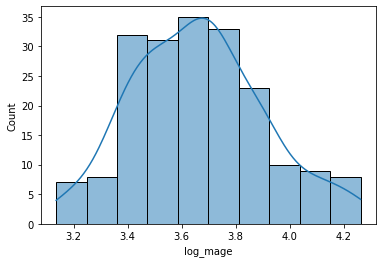

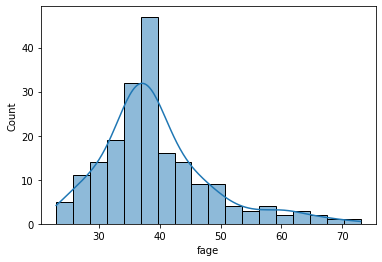

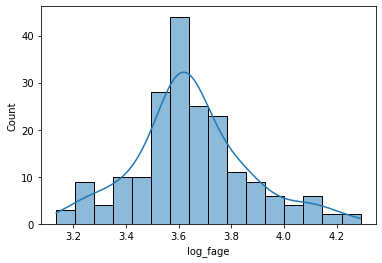

In [35]:
# histogram for Lot_Area (skewed positive)
sns.histplot(data   = birth,
             x      = 'mage',
             kde    = True)


# rendering the plot
plt.show()

# histogram for Lot_Area (skewed positive)
sns.histplot(data   = birth,
             x      = 'log_mage',
             kde    = True)


# rendering the plot
plt.show()

# histogram for Lot_Area (skewed positive)
sns.histplot(data   = birth,
             x      = 'fage',
             kde    = True)


# rendering the plot
plt.show()

# histogram for Lot_Area (skewed positive)
sns.histplot(data   = birth,
             x      = 'log_fage',
             kde    = True)


# rendering the plot
plt.show()

In [36]:
birth.corr().round(decimals=2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc,mv_sum,log_bwght,log_feduc,log_meduc,log_monpre,log_mage,log_fage
mage,1.00,-0.09,0.16,-0.05,0.58,-0.09,-0.21,-0.24,0.17,0.34,-0.05,0.01,-0.02,0.02,-0.08,0.04,0.05,-0.46,0.12,0.01,0.07,0.10,-0.50,-0.11,-0.09,0.15,0.99,0.55
meduc,-0.09,1.00,-0.23,0.14,-0.07,0.62,0.25,0.14,0.10,-0.07,-0.03,-0.28,-0.19,0.46,-0.18,-0.23,0.43,0.09,0.01,-0.02,-0.05,-0.03,0.09,0.43,1.00,-0.25,-0.09,-0.05
monpre,0.16,-0.23,1.00,-0.30,0.04,-0.29,-0.17,-0.08,-0.06,0.02,-0.08,0.08,0.13,-0.21,0.04,0.03,-0.07,-0.05,-0.00,-0.06,0.38,0.21,-0.09,-0.28,-0.23,0.94,0.16,0.02
npvis,-0.05,0.14,-0.30,1.00,-0.04,-0.01,0.08,0.08,0.01,-0.05,-0.03,0.06,-0.08,0.03,0.06,-0.06,0.00,0.04,-0.22,-0.32,-0.17,-0.32,0.09,-0.11,0.14,-0.29,-0.05,-0.03
fage,0.58,-0.07,0.04,-0.04,1.00,-0.01,-0.16,-0.20,0.17,0.29,-0.09,0.04,-0.06,0.03,-0.03,-0.03,0.06,-0.40,0.07,-0.06,-0.01,-0.01,-0.41,-0.05,-0.07,0.06,0.56,0.99
feduc,-0.09,0.62,-0.29,-0.01,-0.01,1.00,0.33,0.13,0.05,-0.12,0.08,-0.41,-0.13,0.52,-0.36,-0.15,0.52,0.13,0.06,0.10,0.01,0.07,0.13,0.89,0.62,-0.27,-0.08,-0.00
omaps,-0.21,0.25,-0.17,0.08,-0.16,0.33,1.00,0.64,-0.15,-0.18,-0.01,-0.18,-0.02,0.19,-0.12,-0.01,0.13,0.25,-0.15,0.01,-0.16,-0.15,0.31,0.27,0.26,-0.19,-0.18,-0.14
fmaps,-0.24,0.14,-0.08,0.08,-0.20,0.13,0.64,1.00,-0.09,-0.16,-0.03,-0.02,-0.07,0.09,0.01,-0.04,0.04,0.25,-0.12,0.01,-0.16,-0.14,0.32,0.08,0.14,-0.12,-0.21,-0.18
cigs,0.17,0.10,-0.06,0.01,0.17,0.05,-0.15,-0.09,1.00,0.36,-0.12,0.03,-0.20,0.17,-0.01,-0.19,0.21,-0.57,0.04,0.07,-0.03,0.03,-0.55,-0.01,0.11,-0.04,0.15,0.18
drink,0.34,-0.07,0.02,-0.05,0.29,-0.12,-0.18,-0.16,0.36,1.00,-0.09,0.16,-0.11,-0.04,0.07,-0.10,0.02,-0.74,0.11,-0.03,-0.06,-0.01,-0.70,-0.13,-0.07,0.04,0.30,0.29


In [37]:
# making 2 copies of birthweight (one for KNN)
birth_explanatory = birth.copy()
knn_explanantory = birth.copy()

# dropping bwght and log_bwght from the explanatory variable set
birth_explanatory = birth_explanatory.drop(['bwght' ,
                                                'log_bwght'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in birth_explanatory:
    print(f"{val} +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
m_meduc +
m_npvis +
m_feduc +
mv_sum +
log_feduc +
log_meduc +
log_monpre +
log_mage +
log_fage +


In [38]:
lm_mod= smf.ols(formula= """bwght ~ cigs +
drink +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
mage +
m_npvis +
npvis +
monpre 
""",                                    
                                 data=birth)

results= lm_mod.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     45.72
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           8.97e-45
Time:                        22:05:52   Log-Likelihood:                -1424.1
No. Observations:                 196   AIC:                             2870.
Df Residuals:                     185   BIC:                             2906.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2947.3666     88.549     33.285      0.0

In [39]:
#creating a regression analysis on a lasso model recommended variable
lm_mod_lasso= smf.ols(formula= """bwght ~ monpre +
feduc +
omaps +
mwhte +
mblck +
fwhte +
fblck +
foth +
m_feduc +
mv_sum +
log_meduc +
log_monpre +
log_mage +
log_fage
""",                                    
                                 data=birth)

results= lm_mod.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     45.72
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           8.97e-45
Time:                        22:05:53   Log-Likelihood:                -1424.1
No. Observations:                 196   AIC:                             2870.
Df Residuals:                     185   BIC:                             2906.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2947.3666     88.549     33.285      0.0

In [63]:
# preparing explanatory variable data
birth_data   = birth.drop(['bwght',
                          'log_bwght',],
                                axis = 1)


# preparing response variables
birth_target = birth.loc[ : , 'bwght']
log_birth_target = birth.loc[ : , 'log_bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birth_data,
            birth_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 26)
y-side: (147,)


Testing Data
------------
X-side: (49, 26)
y-side: (49,)



In [64]:
birth_ols_fit= ['cigs','drink','mwhte','mblck','moth','fwhte','fblck','foth','mage',
         'm_npvis','npvis','monpre']
for val in birth_ols_fit:
    print(f"{val} +")

cigs +
drink +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
mage +
m_npvis +
npvis +
monpre +


In [65]:
birth_train = pd.concat([x_train, y_train], axis = 1)

In [66]:
lm_best = smf.ols(formula =  """bwght ~ cigs +
                                        drink +
                                        mwhte +
                                        mblck +
                                        moth +
                                        fwhte +
                                        fblck +
                                        foth +
                                        mage +
                                        m_npvis +
                                        npvis +
                                        monpre """,
                                data = birth_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     34.92
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           7.69e-33
Time:                        22:16:34   Log-Likelihood:                -1071.2
No. Observations:                 147   AIC:                             2164.
Df Residuals:                     136   BIC:                             2197.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3024.4186    103.723     29.159      0.0

In [44]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = birth.loc[:,birth_ols_fit]


# preparing response variable
birth_target1 = birth.loc[:,'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birth_data,     # x-variables
            birth_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_ols, x_test_ols, y_train_ols, y_test_ols = train_test_split(
            ols_data,         # x-variables
            birth_target1,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [45]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_ols, y_train_ols)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_ols)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_ols, y_train_ols).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_ols, y_test_ols).round(4)) # using R-square

lr_train_score= lr.score(x_train_ols, y_train_ols).round(4)
lr_test_score = lr.score(x_test_ols, y_test_ols).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7197
OLS Testing Score  : 0.6412
OLS Train-Test Gap : 0.0785


In [46]:
# zipping each feature name to its coefficient
lr_model_values = zip(birth_data[birth_ols_fit].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 5040.7)
('cigs', -38.5)
('drink', -108.16)
('mwhte', 78.72)
('mblck', -28.28)
('moth', -50.44)
('fwhte', -79.6)
('fblck', 37.0)
('foth', 42.6)
('mage', -18.02)
('m_npvis', 401.99)
('npvis', 5.06)
('monpre', -5.21)


In [47]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train, y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7443
Lasso Testing Score  : 0.6249
Lasso Train-Test Gap : 0.1194


In [48]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birth_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3657.23)
('mage', -13.69)
('meduc', 20.79)
('monpre', 0.0)
('npvis', 0.56)
('fage', -2.52)
('feduc', 0.0)
('omaps', 0.0)
('fmaps', 78.5)
('cigs', -37.45)
('drink', -98.76)
('male', 44.66)
('mwhte', 0.0)
('mblck', 0.0)
('moth', -63.65)
('fwhte', -0.0)
('fblck', 0.0)
('foth', -0.0)
('m_meduc', -234.42)
('m_npvis', 368.55)
('m_feduc', 0.0)
('mv_sum', 0.0)
('log_feduc', 112.12)
('log_meduc', 0.0)
('log_monpre', 0.0)
('log_mage', -0.0)
('log_fage', -0.0)


In [49]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3657.23)
('mage', -13.69)
('meduc', 20.79)
('npvis', 0.56)
('fage', -2.52)
('omaps', 0.0)
('fmaps', 78.5)
('cigs', -37.45)
('drink', -98.76)
('male', 44.66)
('mblck', 0.0)
('moth', -63.65)
('fblck', 0.0)
('m_meduc', -234.42)
('m_npvis', 368.55)
('mv_sum', 0.0)
('log_feduc', 112.12)
('log_monpre', 0.0)
('log_fage', -0.0)


In [50]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train,y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test)


print('Training Score:', ard_model.score(x_train,y_train).round(4) )
print('Testing Score :',  ard_model.score(x_test,y_test).round(4) )


# saving scoring data for future use
ard_train_score = ard_model.score(x_train,y_train).round(4)
ard_test_score  = ard_model.score(x_test,y_test).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7515
Testing Score : 0.6506
ARD Train-Test Gap : 0.1009


In [51]:
# zipping each feature name to its coefficient
ard_model_values = zip(birth_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -661.25)
('mage', -56.40909)
('meduc', 20.63133)
('monpre', 0.00024)
('npvis', 0.0008)
('fage', -0.00102)
('feduc', 0.00169)
('omaps', 0.00026)
('fmaps', 50.99056)
('cigs', -38.8015)
('drink', -98.55181)
('male', 0.0062)
('mwhte', 0.00101)
('mblck', 8e-05)
('moth', -64.3699)
('fwhte', 0.0004)
('fblck', 5e-05)
('foth', -0.00064)
('m_meduc', -74.89232)
('m_npvis', 233.26411)
('m_feduc', -5e-05)
('mv_sum', -0.00024)
('log_feduc', 92.97442)
('log_meduc', 0.0017)
('log_monpre', 0.00036)
('log_mage', 1713.36346)
('log_fage', -0.00056)


In [52]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -661.25)
('mage', -56.40909)
('meduc', 20.63133)
('monpre', 0.00024)
('npvis', 0.0008)
('fage', -0.00102)
('feduc', 0.00169)
('omaps', 0.00026)
('fmaps', 50.99056)
('cigs', -38.8015)
('drink', -98.55181)
('male', 0.0062)
('mwhte', 0.00101)
('mblck', 8e-05)
('moth', -64.3699)
('fwhte', 0.0004)
('fblck', 5e-05)
('foth', -0.00064)
('m_meduc', -74.89232)
('m_npvis', 233.26411)
('m_feduc', -5e-05)
('mv_sum', -0.00024)
('log_feduc', 92.97442)
('log_meduc', 0.0017)
('log_monpre', 0.00036)
('log_mage', 1713.36346)
('log_fage', -0.00056)


In [53]:
prediction_results = pd.DataFrame(data = {
    'Original Sale Prices' : y_test_FULL,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test,
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test,
    })

prediction_results

,Original Sale Prices,LR Predictions,Lasso Predictions,ARD Predictions,LR Deviation,Lasso Deviation,ARD Deviation
89,3330,3498.94,3526.96,3557.45,168.94,196.96,227.45
158,3850,3751.49,3839.01,3758.13,-98.51,-10.99,-91.87
86,3317,3564.00,3527.17,3599.80,247.00,210.17,282.80
195,4933,4248.05,4308.32,4392.11,-684.95,-624.68,-540.89
27,2637,2999.68,2764.78,2795.40,362.68,127.78,158.40
168,3912,4297.26,4215.12,4176.45,385.26,303.12,264.45
182,4090,3966.66,3966.57,3980.32,-123.34,-123.43,-109.68
74,3170,3685.50,3870.50,3874.25,515.50,700.50,704.25
75,3180,3596.58,3600.76,3557.55,416.58,420.76,377.55
149,3770,3808.09,3905.27,3926.76,38.09,135.27,156.76


In [54]:
knn_data   = knn_explanantory.drop(['bwght',
                            ],
                                axis = 1)


# preparing the target variable
knn_target = knn_explanantory.loc[ : , 'bwght']

In [55]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with birth_data
scaler.fit(knn_data)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(knn_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.68,-2.91,-0.99,-2.56,-1.82,-4.98,-3.94,-6.10,-1.80,-1.80,-1.11,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-0.12,-0.12,-0.19,-0.22,-6.66,-8.31,-3.62,-1.43,-2.16,-2.37
25%,-0.70,-0.94,-0.25,-0.54,-0.51,-0.72,-0.12,0.05,-0.81,-0.47,-1.11,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-0.12,-0.12,-0.19,-0.22,-0.48,-0.36,-0.91,-0.05,-0.68,-0.46
50%,-0.11,0.04,-0.25,0.13,-0.14,0.06,0.51,0.05,0.01,-0.13,0.90,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-0.12,-0.12,-0.19,-0.22,0.25,0.13,0.12,-0.05,0.00,-0.04
75%,0.57,1.03,0.49,0.13,0.41,0.83,0.51,0.05,0.71,0.62,0.90,1.64,1.27,1.37,1.37,1.39,1.49,-0.12,-0.12,-0.19,-0.22,0.62,0.56,1.01,0.76,0.68,0.53
max,3.02,1.52,4.19,5.29,3.76,1.22,1.15,1.59,2.31,2.87,0.90,1.64,1.27,1.37,1.37,1.39,1.49,8.02,8.02,5.20,6.36,1.79,0.75,1.41,2.71,2.46,2.98


In [56]:
x_scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,2.821527,0.042626,1.966570,-2.114215,2.534569,0.057347,-2.667089,-3.023073,1.983574,1.203084,0.902671,-0.608793,1.270171,-0.728869,-0.728869,1.387578,-0.672199,8.020806,-0.124676,5.196152,6.356520,-6.656417,0.132925,0.115090,1.774348,2.347055,2.221805
1,2.723717,-0.940269,0.486924,-0.319364,2.422959,-1.105419,-2.667089,-4.562093,2.312213,1.871085,0.902671,1.642593,-0.787296,-0.728869,1.371989,-0.720680,-0.672199,-0.124676,-0.124676,-0.192450,-0.218034,-3.999007,-0.638902,-0.914753,0.756954,2.287124,2.146557
2,3.017148,-0.940269,0.486924,-1.216790,0.748811,-0.717830,-3.938985,-3.023073,1.654934,2.205085,0.902671,-0.608793,1.270171,-0.728869,-0.728869,1.387578,-0.672199,-0.124676,-0.124676,-0.192450,-0.218034,-3.376825,-0.360427,-0.914753,0.756954,2.464353,0.840493
3,1.843424,1.025520,-0.992721,-0.768077,0.972031,0.832525,-0.759244,-1.484054,1.654934,1.537084,-1.107823,-0.608793,-0.787296,1.371989,-0.728869,-0.720680,1.487654,-0.124676,-0.124676,-0.192450,-0.218034,-2.757171,0.560285,1.007180,-1.431113,1.704311,1.037443
4,0.767511,-0.940269,1.226747,-1.216790,-0.032458,-0.717830,-3.938985,0.054965,0.997655,2.539086,-1.107823,1.642593,-0.787296,-0.728869,1.371989,-0.720680,-0.672199,-0.124676,-0.124676,-0.192450,-0.218034,-2.202142,-0.360427,-0.914753,1.329921,0.857264,0.076567
5,2.625907,-1.431716,1.226747,-0.768077,0.079152,-2.268185,-2.667089,0.054965,0.833336,2.873086,-1.107823,1.642593,-0.787296,-0.728869,1.371989,-0.720680,-0.672199,-0.124676,-0.124676,-0.192450,-0.218034,-2.140787,-1.658097,-1.496054,1.329921,2.226306,0.193728
6,1.354373,-0.940269,-0.252899,0.129348,0.748811,-0.717830,0.512652,0.054965,0.997655,2.205085,0.902671,-0.608793,1.270171,-0.728869,-0.728869,1.387578,-0.672199,-0.124676,-0.124676,-0.192450,-0.218034,-1.999524,-0.360427,-0.914753,-0.050596,1.340784,0.840493
7,3.017148,0.042626,1.226747,-0.992433,1.306861,-1.105419,0.512652,-1.484054,0.669016,2.539086,-1.107823,1.642593,-0.787296,-0.728869,1.371989,-0.720680,-0.672199,-0.124676,-0.124676,-0.192450,-0.218034,-1.961787,-0.638902,0.115090,1.329921,2.464353,1.317990
8,1.549994,-0.940269,-0.992721,-0.543721,1.530080,0.057347,-0.123296,0.054965,0.504696,1.203084,0.902671,1.642593,-0.787296,-0.728869,1.371989,-0.720680,-0.672199,-0.124676,-0.124676,-0.192450,-0.218034,-1.797946,0.132925,-0.914753,-1.431113,1.490080,1.495998
9,1.745614,-0.940269,-0.252899,0.129348,2.422959,0.832525,0.512652,0.054965,0.340377,0.201082,-1.107823,-0.608793,1.270171,-0.728869,-0.728869,1.387578,-0.672199,-0.124676,-0.124676,-0.192450,-0.218034,-1.734112,0.560285,-0.914753,-0.050596,1.634136,2.146557


In [57]:
x_train, x_test, y_train, y_test = train_test_split(
            knn_data,
            knn_target,
            test_size = 0.25,
            random_state = 219)

In [58]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 1.0
KNN Testing Score : 0.3576
KNN Train-Test Gap: 0.6424


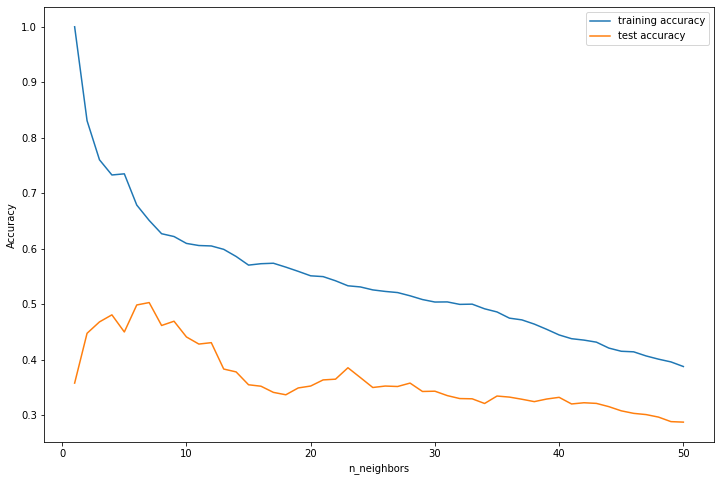

In [59]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [60]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 7


In [61]:
# INSTANTIATING a KNN model object (Standardized)
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 7)


# FITTING to the training data
knn_opt_fit = knn_opt.fit(x_train, y_train)


# PREDICTING on new data
knn_opt_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_opt.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_opt.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(x_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(4))
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(4)

KNN Training Score: 0.6509
KNN Testing Score : 0.5028
KNN Train-Test Gap: 0.1481


In [62]:
# comparing results

print(f"""
Model      Train Score                   Test Score
-----      -----------                   ----------
*OLS*      {lr_train_score}              {lr_test_score} Chosen model
Lasso      {lasso_train_score}              {lasso_test_score}
ARD        {ard_train_score}               {ard_test_score}
KNN        {knn_reg_score_train}            {knn_reg_score_test}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD', 'KNN'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score,knn_reg_score_train],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score,knn_reg_score_test],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap,knn_reg_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}




Model      Train Score                   Test Score
-----      -----------                   ----------
*OLS*      0.7197              0.6412 Chosen model
Lasso      0.7443              0.6249
ARD        0.7515               0.6506
KNN        1.0            0.3576

